<a href="https://colab.research.google.com/github/melizaantunes/modelocartquimio/blob/main/ModeloCARTQuimio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simulações desenvolvidas pelo Guilherme em 26/02/2024**

### **MODELO QUIMIO-CART-MACRÓFAGOS**










**1.Começando importando os pacotes**

In [1]:
import numpy as np #para operacoes matematicas
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp #para solucionar o sistema de edos

**2. Definindo as equações do sistema**


In [6]:
##esse sis1 é o sistema em que a CART nao está em ciclo, mas sim deve ser fornecida como condição inicial. Nesse caso, consideramos que tanto
#o tratamento com quimio quanto o com CART inicia em t=0
def sis1(t, y, alpha1, beta1, K1, mu1, kappa1, k, alpha2, K2, kappa2, alpha3, kappa3, q, lambd):
    T, M, C, Q = y
    dT_dt = alpha1 * T * (np.log(K1/T)) * (1 + beta1*M) - mu1*T*(1-np.exp(-k*Q)) - kappa1*T*C
    dM_dt = alpha2 * M * T * (1 - M/K2) - kappa2*M #mu2*M*(1-np.exp(-k*Q))
    dC_dt = alpha3 * C * T - kappa3*C
    dQ_dt = q - lambd * Q

    return [dT_dt, dM_dt, dC_dt, dQ_dt]

    #Para o caso em que o tratamento nao é no inicio, temos outros sistemas pois precisamos modificar o código
    def sis2(t, y, alpha1, beta1, K1, mu1, kappa1, k, alpha2, K2, kappa2, alpha3, kappa3, q, lambd, dose_cart, ciclo_cart, ciclo_quimio): T, M, C, Q = y
    dT_dt = alpha1 * T * (np.log(K1/T)) * (1 + beta1*M) - mu1*T*(1-np.exp(-k*Q)) - kappa1*T*C
    dM_dt = alpha2 * M * T * (1 - M/K2) - kappa2*M #mu2*M*(1-np.exp(-k*Q))

    if t < ciclo_cart:
        dC_dt = 0
    else:
        dC_dt = dose_cart * alpha3 * T - kappa3 * dose_cart

    if t < ciclo_quimio:
        dQ_dt = 0
    else:
        dQ_dt = q - lambd * Q

    return [dT_dt, dM_dt, dC_dt, dQ_dt]

**3. Tempo de controle do tumor**

Outra análise a ser feita o tempo que demora para o tumor ser controlado (se estabilizar). Defina tempos como sendo o seu dataframe que guarda o tempo de simulação, variável como sendo o que guarda as soluções, e limiar a quantidade de células

In [7]:
def tempo_controle(tempos, variavel, limiar):
    indice_limiar = np.argmax(variavel < limiar)

    if indice_limiar == len(variavel):
        print(f"A variável nunca atinge um valor menor que {limiar}.")
        return None
    else:
        tempo_limiar = tempos[indice_limiar]
        return tempo_limiar

**4. Valores dos parâmetros utilizados**

In [8]:
alpha1 = 0.69   #fixo
beta1 = 2.3e-10
K1 = 1e9        #fixo
mu1 = 0.9       #fixo
kappa1 = 1e-6


K2 = 1e9        #fixo
alpha2 = 1e-7   #fixo
K2 = 1e9        #fixo
kappa2 = 0.34   #fixo

alpha3 = 5e-8 #Tem potencial para diminuir o volume tumoral ([5e-8, 5e-6])
kappa3 = 0.5

q = 2.35        #fixo
lambd = 4.16    #fixo
k = 1           #fixo



---

### **CENÁRIOS PROPOSTOS**

*1. Quimioterapia e CART em t=0, para diferentes valores de \alpha_3*

In [9]:
# Condições iniciais
condicoes_iniciais = [2e6, 1e6, 5e6, 0]  # Substitua pelos valores iniciais desejados

# Tempo de integração
tempo = (0, 50)

# Resolvendo o sistema de equações diferenciais utilizando o pacote solve_ivp
alpha3 = 5e-8

solucao1_cen1 = solve_ivp(sis1, tempo, condicoes_iniciais, args=(alpha1, beta1, K1, mu1, kappa1, k, alpha2, K2, kappa2, alpha3, kappa3, q, lambd), t_eval=np.linspace(0, 50, 1000), method='LSODA')
limiar_desejado = 1e2
tempo_limiar = tempo_controle(solucao1_cen1.t, solucao1_cen1.y[0], limiar_desejado)
# Exibindo o tempo em que a população tumoral atinge um valor menor que o limiar
print(f"Tempo em que a população tumoral atinge um valor menor que {limiar_desejado} células: {tempo_limiar} unidades de tempo.")
print(f"Valor máximo de células tumorais é de {max(solucao1_cen1.y[0])} e o valor mínimo é de {min(solucao1_cen1.y[0])}")
print(f"Pico de expansão das células CAR-T é de {max(solucao1_cen1.y[2])} e estabiliza em {solucao1_cen1.y[2][-1]}")
print('\n')

alpha3 = 5e-7
solucao2_cen1 = solve_ivp(sis1, tempo, condicoes_iniciais, args=(alpha1, beta1, K1, mu1, kappa1, k, alpha2, K2, kappa2, alpha3, kappa3, q, lambd), t_eval=np.linspace(0, 50, 1000), method='LSODA')
limiar_desejado = 1e2
tempo_limiar = tempo_controle(solucao2_cen1.t, solucao2_cen1.y[0], limiar_desejado)
# Exibindo o tempo em que a população tumoral atinge um valor menor que o limiar
print(f"Tempo em que a população tumoral atinge um valor menor que {limiar_desejado} células: {tempo_limiar} unidades de tempo.")
print(f"Valor máximo de células tumorais é de {max(solucao2_cen1.y[0])} e o valor mínimo é de {min(solucao2_cen1.y[0])}")
print(f"Pico de expansão das células CAR-T é de {max(solucao2_cen1.y[2])} e estabiliza em {solucao2_cen1.y[2][-1]}")
print('\n')

alpha3 = 5e-6
solucao3_cen1 = solve_ivp(sis1, tempo, condicoes_iniciais, args=(alpha1, beta1, K1, mu1, kappa1, k, alpha2, K2, kappa2, alpha3, kappa3, q, lambd), t_eval=np.linspace(0, 50, 1000), method='LSODA')
limiar_desejado = 1e2
tempo_limiar = tempo_controle(solucao3_cen1.t, solucao3_cen1.y[0], limiar_desejado)
# Exibindo o tempo em que a população tumoral atinge um valor menor que o limiar
print(f"Tempo em que a população tumoral atinge um valor menor que {limiar_desejado} células: {tempo_limiar} unidades de tempo.")
print(f"Valor máximo de células tumorais é de {max(solucao3_cen1.y[0])} e o valor mínimo é de {min(solucao3_cen1.y[0])}")
print(f"Pico de expansão das células CAR-T é de {max(solucao3_cen1.y[2])} e estabiliza em {solucao3_cen1.y[2][-1]}")
print('\n')

Tempo em que a população tumoral atinge um valor menor que 100.0 células: 0.0 unidades de tempo.
Valor máximo de células tumorais é de 15353462.103528043 e o valor mínimo é de 1646612.365077678
Pico de expansão das células CAR-T é de 5000000.0 e estabiliza em 3271495.729301665


Tempo em que a população tumoral atinge um valor menor que 100.0 células: 0.0 unidades de tempo.
Valor máximo de células tumorais é de 2000000.0000000002 e o valor mínimo é de 516751.96148645435
Pico de expansão das células CAR-T é de 5724725.412654445 e estabiliza em 4377764.9486936815


Tempo em que a população tumoral atinge um valor menor que 100.0 células: 0.0 unidades de tempo.
Valor máximo de células tumorais é de 2000000.0 e o valor mínimo é de 119.50753974077969
Pico de expansão das células CAR-T é de 18903781.81387167 e estabiliza em 5961419.268260837




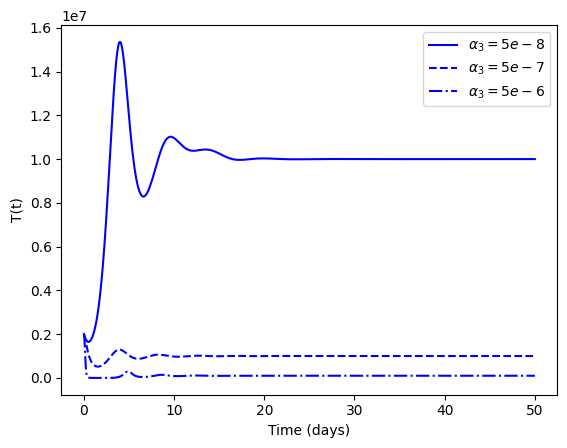

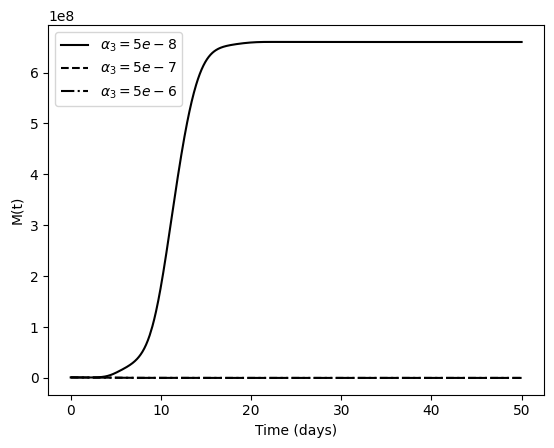

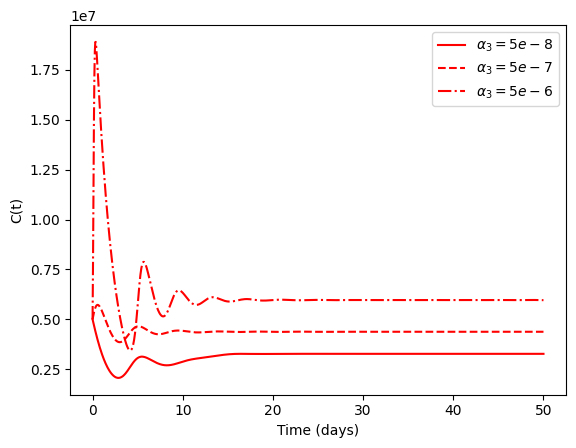

In [10]:
# Plotando os resultados
plt.figure()
plt.plot(solucao1_cen1.t, solucao1_cen1.y[0],'-b', label='$α_{3}=5e-8$')
plt.plot(solucao2_cen1.t, solucao2_cen1.y[0],'--b', label='$α_{3}=5e-7$')
plt.plot(solucao3_cen1.t, solucao3_cen1.y[0],'-.b', label='$α_{3}=5e-6$')
plt.xlabel('Time (days)')
plt.ylabel('T(t)')
plt.legend()
plt.show()

plt.figure()
plt.plot(solucao1_cen1.t, solucao1_cen1.y[1],'-k', label='$α_{3}=5e-8$')
plt.plot(solucao2_cen1.t, solucao2_cen1.y[1],'--k', label='$α_{3}=5e-7$')
plt.plot(solucao3_cen1.t, solucao3_cen1.y[1],'-.k', label='$α_{3}=5e-6$')
plt.xlabel('Time (days)')
plt.ylabel('M(t)')
plt.legend()
plt.show()

plt.figure()
plt.plot(solucao1_cen1.t, solucao1_cen1.y[2],'-r', label='$α_{3}=5e-8$')
plt.plot(solucao2_cen1.t, solucao2_cen1.y[2],'--r', label='$α_{3}=5e-7$')
plt.plot(solucao3_cen1.t, solucao3_cen1.y[2],'-.r', label='$α_{3}=5e-6$')
plt.xlabel('Time (days)')
plt.ylabel('C(t)')
plt.legend()
plt.show()

*2.CART sem quimioterapia, para diferentes valores de \alpha_3*


In [11]:
q = 0        #fixo
lambd = 0    #fixo
k = 0        #fixo

# Resolvendo o sistema de equações diferenciais utilizando o pacote solve_ivp
alpha3 = 5e-8
solucao1_cen2 = solve_ivp(sis1, tempo, condicoes_iniciais, args=(alpha1, beta1, K1, mu1, kappa1, k, alpha2, K2, kappa2, alpha3, kappa3, q, lambd), t_eval=np.linspace(0, 50, 1000), method='LSODA')
limiar_desejado = 1e2
tempo_limiar = tempo_controle(solucao1_cen2.t, solucao1_cen2.y[0], limiar_desejado)
# Exibindo o tempo em que a população tumoral atinge um valor menor que o limiar
print(f"Tempo em que a população tumoral atinge um valor menor que {limiar_desejado} células: {tempo_limiar} unidades de tempo.")
print(f"Valor máximo de células tumorais é de {max(solucao1_cen2.y[0])} e o valor mínimo é de {min(solucao1_cen2.y[0])}")
print(f"Pico de expansão das células CAR-T é de {max(solucao1_cen2.y[2])} e estabiliza em {solucao1_cen2.y[2][-1]}")
print('\n')

alpha3 = 5e-7
solucao2_cen2 = solve_ivp(sis1, tempo, condicoes_iniciais, args=(alpha1, beta1, K1, mu1, kappa1, k, alpha2, K2, kappa2, alpha3, kappa3, q, lambd), t_eval=np.linspace(0, 50, 1000), method='LSODA')
limiar_desejado = 1e2
tempo_limiar = tempo_controle(solucao2_cen2.t, solucao2_cen2.y[0], limiar_desejado)
# Exibindo o tempo em que a população tumoral atinge um valor menor que o limiar
print(f"Tempo em que a população tumoral atinge um valor menor que {limiar_desejado} células: {tempo_limiar} unidades de tempo.")
print(f"Valor máximo de células tumorais é de {max(solucao2_cen2.y[0])} e o valor mínimo é de {min(solucao2_cen2.y[0])}")
print(f"Pico de expansão das células CAR-T é de {max(solucao2_cen2.y[2])} e estabiliza em {solucao2_cen2.y[2][-1]}")
print('\n')

alpha3 = 5e-6
solucao3_cen2 = solve_ivp(sis1, tempo, condicoes_iniciais, args=(alpha1, beta1, K1, mu1, kappa1, k, alpha2, K2, kappa2, alpha3, kappa3, q, lambd), t_eval=np.linspace(0, 50, 1000), method='LSODA')
limiar_desejado = 1e2
tempo_limiar = tempo_controle(solucao3_cen2.t, solucao3_cen2.y[0], limiar_desejado)
# Exibindo o tempo em que a população tumoral atinge um valor menor que o limiar
print(f"Tempo em que a população tumoral atinge um valor menor que {limiar_desejado} células: {tempo_limiar} unidades de tempo.")
print(f"Valor máximo de células tumorais é de {max(solucao3_cen2.y[0])} e o valor mínimo é de {min(solucao3_cen2.y[0])}")
print(f"Pico de expansão das células CAR-T é de {max(solucao3_cen2.y[2])} e estabiliza em {solucao3_cen2.y[2][-1]}")
print('\n')

Tempo em que a população tumoral atinge um valor menor que 100.0 células: 0.0 unidades de tempo.
Valor máximo de células tumorais é de 15644723.575276071 e o valor mínimo é de 1791112.6427087113
Pico de expansão das células CAR-T é de 5000000.000000001 e estabiliza em 3659922.099374553


Tempo em que a população tumoral atinge um valor menor que 100.0 células: 0.0 unidades de tempo.
Valor máximo de células tumorais é de 2000000.0 e o valor mínimo é de 598352.2528281402
Pico de expansão das células CAR-T é de 5838852.113632426 e estabiliza em 4767741.063268048


Tempo em que a população tumoral atinge um valor menor que 100.0 células: 0.0 unidades de tempo.
Valor máximo de células tumorais é de 2000000.0000000002 e o valor mínimo é de 141.58292440954827
Pico de expansão das células CAR-T é de 19130427.239938505 e estabiliza em 6356075.280285656




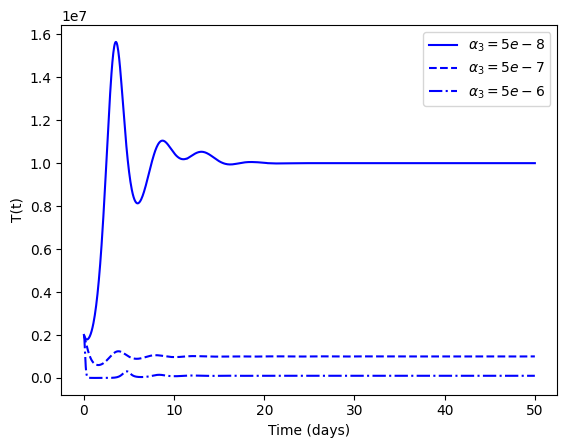

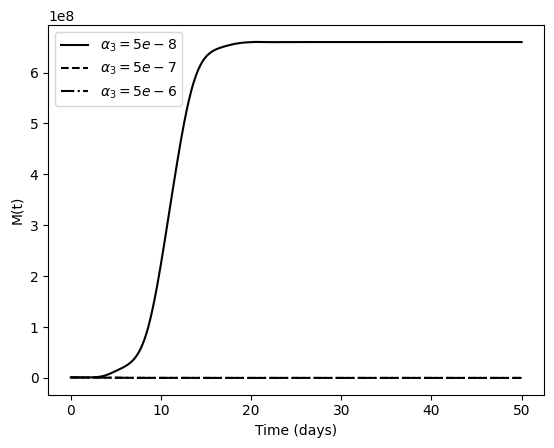

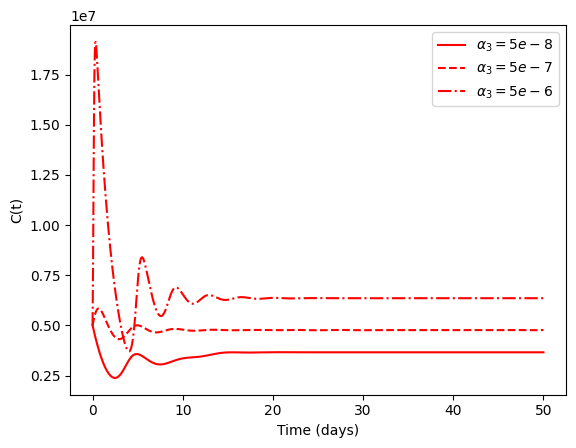

In [12]:
# Plotando os resultados
plt.figure()
plt.plot(solucao1_cen2.t, solucao1_cen2.y[0],'-b', label='$α_{3}=5e-8$')
plt.plot(solucao2_cen2.t, solucao2_cen2.y[0],'--b', label='$α_{3}=5e-7$')
plt.plot(solucao3_cen2.t, solucao3_cen2.y[0],'-.b', label='$α_{3}=5e-6$')
plt.xlabel('Time (days)')
plt.ylabel('T(t)')
plt.legend()
plt.show()

plt.figure()
plt.plot(solucao1_cen2.t, solucao1_cen2.y[1],'-k', label='$α_{3}=5e-8$')
plt.plot(solucao2_cen2.t, solucao2_cen2.y[1],'--k', label='$α_{3}=5e-7$')
plt.plot(solucao3_cen2.t, solucao3_cen2.y[1],'-.k', label='$α_{3}=5e-6$')
plt.xlabel('Time (days)')
plt.ylabel('M(t)')
plt.legend()
plt.show()

plt.figure()
plt.plot(solucao1_cen2.t, solucao1_cen2.y[2],'-r', label='$α_{3}=5e-8$')
plt.plot(solucao2_cen2.t, solucao2_cen2.y[2],'--r', label='$α_{3}=5e-7$')
plt.plot(solucao3_cen2.t, solucao3_cen2.y[2],'-.r', label='$α_{3}=5e-6$')
plt.xlabel('Time (days)')
plt.ylabel('C(t)')
plt.legend()
plt.show()

*3. Quimio 5 dias após a injeção do tumor e CART em diferentes dias após a quimio*